<a href="https://colab.research.google.com/github/iremaricii/data_pre_processing-NLP/blob/main/netflix_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [268]:
with open('/content/netflix_titles.csv', 'r', encoding='utf-8') as f:
    lines = f.readlines()

In [ ]:
for i, line in enumerate(lines[:10]):
    print(f"{i}. satır: {line.count(',') + 1} sütun")


In [ ]:
expected_columns = 12

dirty_rows = []
for i, line in enumerate(lines):
    column_count = line.count(',') + 1
    if column_count != expected_columns:
        dirty_rows.append((i, column_count, line.strip()))

print(f"Toplam bozuk satır: {len(dirty_rows)}")


In [271]:
import csv

cleaned_data = []
with open('/content/netflix_titles.csv', newline='', encoding='utf-8') as f:
    reader = csv.reader(f, delimiter=',', quotechar='"')
    for row in reader:
        cleaned_data.append(row)

# İlk satır başlık, kalanlar veri
columns = cleaned_data[0]
data_rows = cleaned_data[1:]

# Sadece doğru uzunluktaki satırları al
filtered_rows = [row for row in data_rows if len(row) == len(columns)]


In [272]:
with open('/content/netflix_titles.csv', 'r', encoding='utf-8') as f:
    lines = f.readlines()


In [ ]:
print(f"Toplam satır sayısı: {len(lines)}")
print("İlk 2 satır örnek:")
print(lines[0])
print(lines[1])


In [274]:
cleaned_data = []
with open('/content/netflix_titles.csv', newline='', encoding='utf-8') as f:
    reader = csv.reader(f, delimiter=',', quotechar='"')
    for row in reader:
        cleaned_data.append(row)


In [ ]:
print(f"Toplam okunan satır: {len(cleaned_data)}")
print(f"Bir satırda kaç sütun var? {len(cleaned_data[0])}")  # Başlık satırı
print("İlk veri satırı:")
print(cleaned_data[1])


In [276]:
import pandas as pd

columns = cleaned_data[0]       # İlk satır: başlıklar
data_rows = cleaned_data[1:]    # Kalanlar: veriler

df = pd.DataFrame(data_rows, columns=columns)


In [ ]:
df.head()
df.info()

In [ ]:
df.replace('', pd.NA, inplace=True)  # Boş stringleri NaN yapalım

# Sonra eksik verileri görelim:
print(df.isnull().sum())

In [ ]:
df['director'].fillna('Bilinmiyor', inplace=True)
df['cast'].fillna('Bilinmiyor', inplace=True)
df['country'].fillna('Bilinmiyor', inplace=True)
df['date_added'].fillna('Bilinmiyor', inplace=True)
df['rating'].fillna('Bilinmiyor', inplace=True)
df['duration'].fillna('Bilinmiyor', inplace=True)


In [ ]:
df.isnull().sum()


In [281]:
df[['duration_value', 'duration_unit']] = df['duration'].str.extract(r'(\d+)\s*(\D+)')


In [282]:
df['release_year'] = pd.to_numeric(df['release_year'])
df['duration_value'] = pd.to_numeric(df['duration_value'])


In [ ]:
df.dtypes


In [284]:
df[['duration_value', 'duration_unit']] = df['duration'].str.extract(r'(\d+)\s*(\D+)')


In [285]:
df['duration_value'] = pd.to_numeric(df['duration_value'])


In [ ]:
df[['duration', 'duration_value', 'duration_unit']].head(10)


In [287]:
df['duration_value'] = df['duration_value'].astype('Int64')


In [288]:
df['release_year'] = df['release_year'].astype(int)


In [ ]:
print(df['release_year'].head())
print(df.dtypes['release_year'])


In [291]:
df['rating'] = df['rating'].replace('Bilinmiyor', 'Not Rated')



In [292]:
df['rating'] = df['rating'].replace(['NR', 'UR'], 'Not Rated')


In [293]:
df = df[~df['rating'].isin(['66 min', '74 min', '84 min'])]


In [ ]:
df['rating'].value_counts()


In [ ]:
df['type'].value_counts()


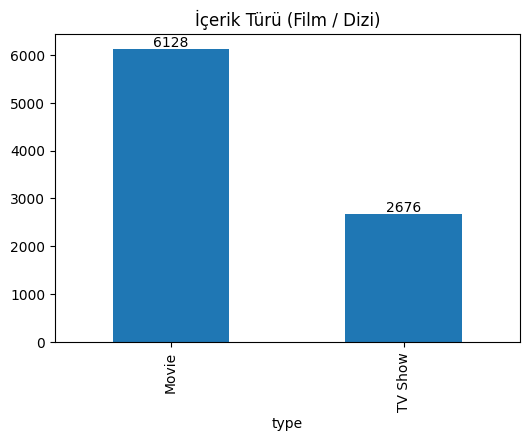

In [296]:
counts = df['type'].value_counts()
ax = counts.plot(kind='bar', figsize=(6,4), title='İçerik Türü (Film / Dizi)')
for i, count in enumerate(counts):
    ax.text(i, count + 50, str(count), ha='center')


In [ ]:
import nltk
import string
from nltk.corpus import stopwords

nltk.download('stopwords')


In [298]:
stop_words = set(stopwords.words('english'))


In [299]:
def temizle(metin):
    metin = metin.lower()  # küçük harfe çevir
    metin = metin.translate(str.maketrans('', '', string.punctuation))  # noktalama sil
    kelimeler = metin.split()  # kelimelere ayır
    temiz_kelimeler = [kelime for kelime in kelimeler if kelime not in stop_words]  # stopword çıkar
    return " ".join(temiz_kelimeler)


In [300]:
df['clean_description'] = df['description'].apply(temizle)


In [301]:
df[['description', 'clean_description']].head(5)


,description,clean_description
0,"As her father nears the end of his life, filmm...",father nears end life filmmaker kirsten johnso...
1,"After crossing paths at a party, a Cape Town t...",crossing paths party cape town teen sets prove...
2,To protect his family from a powerful drug lor...,protect family powerful drug lord skilled thie...
3,"Feuds, flirtations and toilet talk go down amo...",feuds flirtations toilet talk go among incarce...
4,In a city of coaching centers known to train I...,city coaching centers known train india’s fine...


In [ ]:
from collections import Counter

# Tüm temiz açıklamaları bir araya getir
tum_kelimeler = " ".join(df['clean_description'].dropna()).split()

# En sık geçen 20 kelime
kelime_sayilari = Counter(tum_kelimeler).most_common(20)

for kelime, sayi in kelime_sayilari:
    print(f"{kelime}: {sayi}")


In [ ]:
!pip install wordcloud


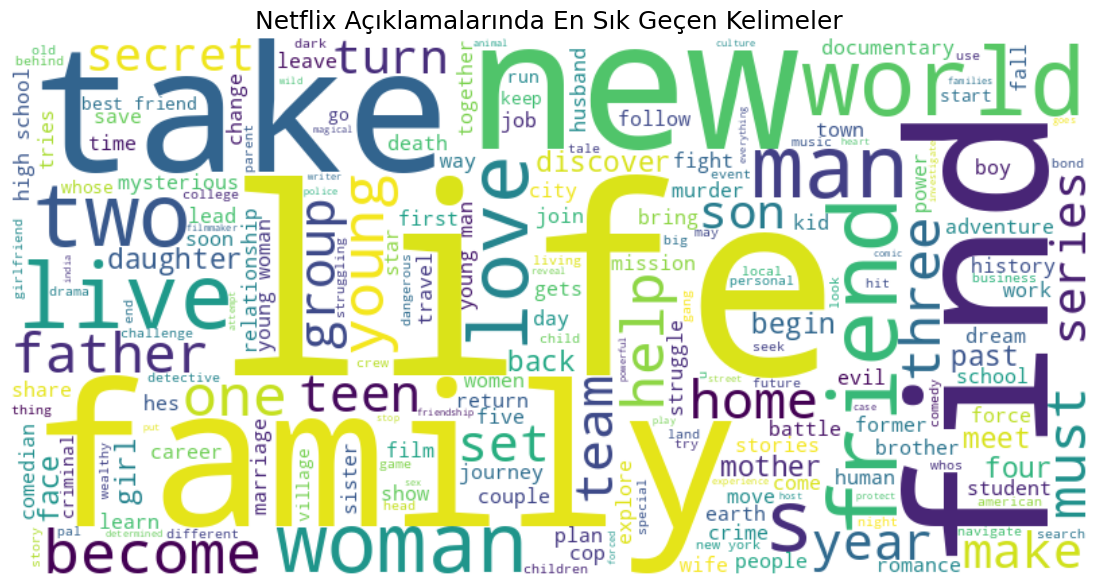

In [304]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Tüm temiz açıklamaları birleştir
metin = " ".join(df['clean_description'].dropna())

# Word Cloud nesnesi oluştur
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(metin)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Netflix Açıklamalarında En Sık Geçen Kelimeler", fontsize=18)
plt.show()

In [317]:
df.to_csv('new_netflix.csv', sep=';', index=False)

In [306]:
from sklearn.cluster import KMeans

# KMeans'i oluştur
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans.fit(tfidf_matrix)

# Küme numaralarını ekle
df['cluster'] = kmeans.labels_


In [307]:
def icerigin_kumesini_bul(title):
    cluster_num = df.loc[df['title'] == title, 'cluster'].values[0]
    return cluster_num


In [308]:
def kumeden_oneriler(title, num_recommendations=5):
    cluster_num = icerigin_kumesini_bul(title)
    kumedeki_diger_icerikler = df[(df['cluster'] == cluster_num) & (df['title'] != title)]
    oneriler = kumedeki_diger_icerikler[['title', 'description']].sample(n=num_recommendations)
    oneriler.reset_index(drop=True, inplace=True)
    return oneriler, cluster_num


In [ ]:
import difflib

def kelime_icerenleri_bul(keyword, titles_list):
    keyword = keyword.lower()
    matches = [title for title in titles_list if keyword in title.lower()]
    if not matches:
        matches = difflib.get_close_matches(keyword, titles_list, n=5, cutoff=0.4)
    return matches

def icerigin_kumesini_bul(title):
    cluster_num = df.loc[df['title'].str.lower() == title.lower(), 'cluster'].values
    if len(cluster_num) == 0:
        return None
    return cluster_num[0]

def kumeden_oneriler(title, num_recommendations=5):
    cluster_num = icerigin_kumesini_bul(title)

    if cluster_num is None:
        print(f"'{title}' isimli içerik bulunamadı.\n")

        kelime_matchleri = kelime_icerenleri_bul(title, df['title'].tolist())
        if kelime_matchleri:
            print(f" '{title}' ile eşleşen içerikler bulundu:\n")
            for idx, baslik in enumerate(kelime_matchleri, 1):
                print(f"{idx}. {baslik}")
            secim = input("\nListeden bir seçim yapın ya da çıkmak için 'E' yazın: ")
            if secim.isdigit() and 1 <= int(secim) <= len(kelime_matchleri):
                kumeden_oneriler(kelime_matchleri[int(secim)-1], num_recommendations)
            else:
                print("Çıkış yapıldı.")
            return
        else:
            print("Benzer içerik bulunamadı. Başka bir içerik deneyin.")
            return

    kumedeki_diger_icerikler = df[(df['cluster'] == cluster_num) & (df['title'].str.lower() != title.lower())]

    if kumedeki_diger_icerikler.empty:
        print("Bu içerik için öneri bulunamadı.")
        return

    oneriler = kumedeki_diger_icerikler[['title', 'description']].sample(min(num_recommendations, len(kumedeki_diger_icerikler)))
    oneriler.reset_index(drop=True, inplace=True)

    print(f"\n '{title}' adlı içerik '{cluster_num}' numaralı kümeye ait.")
    print("\n İşte size özel öneriler:\n")
    for i, row in oneriler.iterrows():
        print(f"{i+1}. Başlık: {row['title']}")
        print(f"Açıklama: {row['description']}\n")

kullanici_girisi = input("İzlediğiniz veya sevdiğiniz içeriğin adını yazın: ")
kumeden_oneriler(kullanici_girisi)
